In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('result.csv')
df

,Order_Id,Product,Quantity,Price,Total,Order_Date,Adress,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [4]:
'917 1st St, Dallas, TX 75001'.split(',')[1].strip()

'Dallas'

In [8]:
'917 1st St, Dallas, TX 75001'.split(',')[2].split(' ')[1]

'TX'

In [9]:
def get_city(address):
    city = address.split(',')[1].strip()
    state = address.split(',')[2].split(' ')[1]
    return f'{city}, {state}'

df['City'] = df.Adress.apply(get_city)

In [10]:
df

,Order_Id,Product,Quantity,Price,Total,Order_Date,Adress,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston, MA"
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,"Los Angeles, CA"
185946,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,"San Francisco, CA"
185947,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,"San Francisco, CA"
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,"San Francisco, CA"


In [11]:
df.City.unique()

array(['Dallas, TX', 'Boston, MA', 'Los Angeles, CA', 'San Francisco, CA',
       'Seattle, WA', 'Atlanta, GA', 'New York City, NY', 'Portland, OR',
       'Austin, TX', 'Portland, ME'], dtype=object)

In [12]:
df.City.unique().size

10

In [18]:
result = df.groupby('City')[['Total']].sum()
result

,Total
City,
"Atlanta, GA",2795498.58
"Austin, TX",1819581.75
"Boston, MA",3661642.01
"Dallas, TX",2767975.40
"Los Angeles, CA",5452570.80
"New York City, NY",4664317.43
"Portland, ME",449758.27
"Portland, OR",1870732.34
"San Francisco, CA",8262203.91


In [19]:
import matplotlib.pyplot as plt

C:\Users\Yevheniia\AppData\Local\Temp\ipykernel_6136\4117612571.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.yticks(range(0, int(round(result.max()[0])), 500000))


ValueError: Cannot specify ',' with '\x20'.

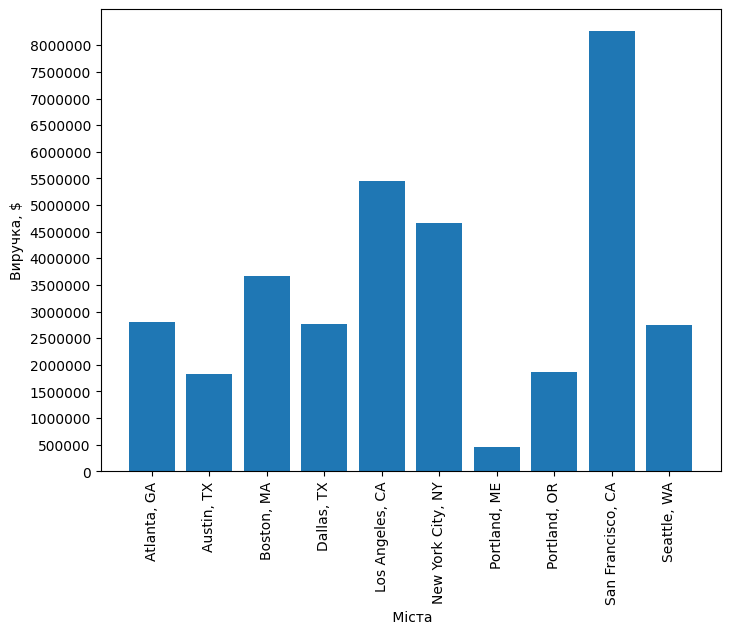

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(result.index, result.Total)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(result.index, rotation='vertical')
plt.yticks(range(0, int(round(result.max()[0])), 500000))

plt.xlabel(' Міста')
plt.ylabel('Виручка, $')

for index, value in enumerate(result.Total):
    plt.text(
        index,
        500000,
        '{0:, }'.format(round(value)).replace(',', ' '),
        rotation='vertical',
        size='15',
        color='#0000',
        ha='center'
    )
plt.grid()
plt.show()